# [TEMPLATE] DATASET DEPURADO

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib_venn import venn3

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
#plt.rcParams['figure.figsize'] = (20, 10)
sns.set(style="whitegrid") # seteando tipo de grid en seaborn

In [3]:
df = pd.read_csv('./data/train.csv', dtype={'id':'uint32', 'provincia':'category',
                                            'tipodepropiedad':'category', 'gimnasio':'bool',
                                            'usosmultiples':'bool', 'piscina':'bool', 'escuelascercanas':'bool',
                                            'centroscomercialescercanos':'bool'})

# OJO, debe tener el archivo train.csv en la carpeta data.

In [4]:
df['antiguedad'] = df['antiguedad'].fillna(-1)
df['antiguedad'] = df['antiguedad'].astype(np.int8)
df['habitaciones'] = df['habitaciones'].fillna(-1)
df['habitaciones'] = df['habitaciones'].astype(np.int8)
df['garages'] = df['garages'].fillna(-1)
df['garages'] = df['garages'].astype(np.int8)
df['banos'] = df['banos'].fillna(-1)
df['banos'] = df['banos'].astype(np.int8)
df['idzona'] = df['idzona'].fillna(-1)
df['idzona'] = df['idzona'].astype(np.int32)
df['metroscubiertos'] = df['metroscubiertos'].fillna(-1)
df['metroscubiertos'] = df['metroscubiertos'].astype(np.int16)
df['metrostotales'] = df['metrostotales'].fillna(-1)
df['metrostotales'] = df['metrostotales'].astype(np.int16)
df['precio'] = df['precio'].astype(np.uint32)
df['fecha'] = pd.to_datetime(df['fecha'])

# OJO, los valores "-1" representan nulls.

In [5]:
df.columns

Index(['id', 'titulo', 'descripcion', 'tipodepropiedad', 'direccion', 'ciudad',
       'provincia', 'antiguedad', 'habitaciones', 'garages', 'banos',
       'metroscubiertos', 'metrostotales', 'idzona', 'lat', 'lng', 'fecha',
       'gimnasio', 'usosmultiples', 'piscina', 'escuelascercanas',
       'centroscomercialescercanos', 'precio'],
      dtype='object')

In [99]:
df2 = df.loc[(~df['piscina'].isnull()) & (~df['gimnasio'].isnull()) & (~df['usosmultiples'].isnull())]

In [100]:
ids_con_piscina = set(df2.loc[df2['piscina'] == True].id)

In [101]:
ids_con_gimnasio = set(df2.loc[df2['gimnasio'] == True].id)

In [102]:
ids_con_sum = set(df2.loc[df2['usosmultiples'] == True].id)

In [120]:
precio_promedio_piscina = int(df2.loc[(df2['piscina'] == True) & (df2['gimnasio'] == False) & (df2['usosmultiples'] == False)]['precio'].mean())
precio_promedio_gym = int(df2.loc[(df2['piscina'] == False) & (df2['gimnasio'] == True) & (df2['usosmultiples'] == False)]['precio'].mean())
precio_promedio_sum = int(df2.loc[(df2['piscina'] == False) & (df2['gimnasio'] == False) & (df2['usosmultiples'] == True)]['precio'].mean())

precio_promedio_piscina_gym = int(df2.loc[(df2['piscina'] == True) & (df2['gimnasio'] == True) & (df2['usosmultiples'] == False)]['precio'].mean())
precio_promedio_piscina_sum = int(df2.loc[(df2['piscina'] == True) & (df2['gimnasio'] == False) & (df2['usosmultiples'] == True)]['precio'].mean())
precio_promedio_gym_sum = int(df2.loc[(df2['piscina'] == False) & (df2['gimnasio'] == True) & (df2['usosmultiples'] == True)]['precio'].mean())

precio_promedio_todo = int(df2.loc[(df2['piscina'] == True) & (df2['gimnasio'] == True) & (df2['usosmultiples'] == True)]['precio'].mean())

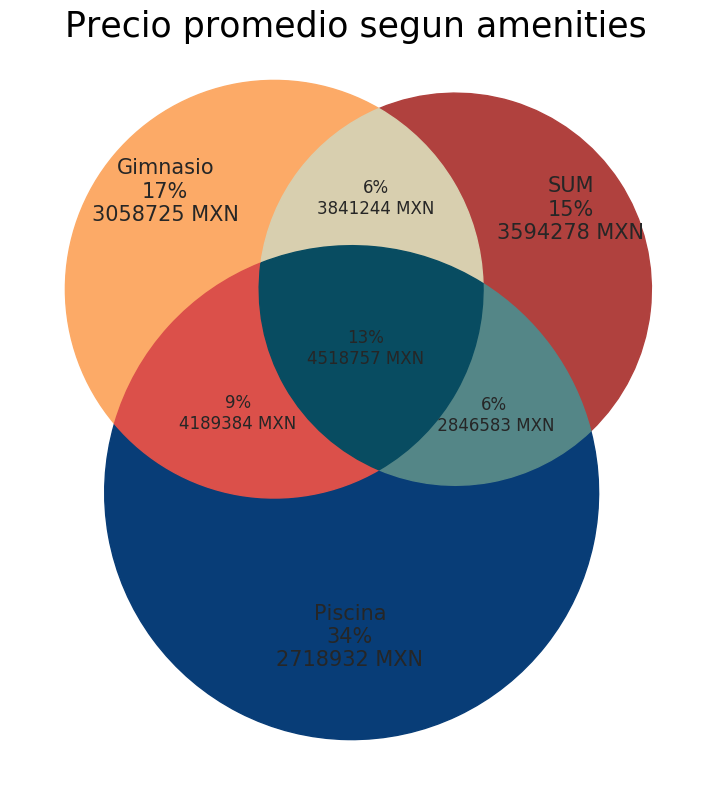

In [136]:
plt.figure(figsize=(20, 10))
g = venn3([ids_con_gimnasio,ids_con_sum,ids_con_piscina],set_labels=('A','B','C'),alpha=1)

cant_total = int(g.get_label_by_id('100').get_text()) + int(g.get_label_by_id('010').get_text()) + int(g.get_label_by_id('001').get_text()) + int(g.get_label_by_id('110').get_text()) + int(g.get_label_by_id('101').get_text()) + int(g.get_label_by_id('011').get_text()) + int(g.get_label_by_id('111').get_text())
#cant_total = len(df2)

plt.text(0,0.6,'Precio promedio segun amenities', ha='center', va='bottom', size=25, color='#000000' )
plt.gca().set_facecolor('#FFFFC7')
g.get_label_by_id('A').set_size(15)
g.get_label_by_id('A').set_text("")

g.get_label_by_id('B').set_size(15)
g.get_label_by_id('B').set_text("")

g.get_label_by_id('C').set_size(15)
g.get_label_by_id('C').set_text("")


g.get_patch_by_id('100').set_alpha(1)
g.get_patch_by_id('100').set_color("#FCAA67")
porcentaje100 = int(round(100*float(g.get_label_by_id('100').get_text())/cant_total))
g.get_label_by_id('100').set_text(f"Gimnasio\n{porcentaje100}%\n{precio_promedio_gym} MXN")
g.get_label_by_id('100').set_size(15)

g.get_patch_by_id('010').set_alpha(1)
g.get_patch_by_id('010').set_color("#B0413E")
porcentaje010 = int(round(100*float(g.get_label_by_id('010').get_text())/cant_total))
g.get_label_by_id('010').set_text(f"SUM\n{porcentaje010}%\n{precio_promedio_sum} MXN")
g.get_label_by_id('010').set_size(15)

g.get_patch_by_id('001').set_alpha(1)
g.get_patch_by_id('001').set_color("#083D77")
porcentaje001 = int(round(100*float(g.get_label_by_id('001').get_text())/cant_total)-1)
g.get_label_by_id('001').set_text(f"Piscina\n{porcentaje001}%\n{precio_promedio_piscina} MXN")
g.get_label_by_id('001').set_size(15)

g.get_patch_by_id('011').set_alpha(1)
g.get_patch_by_id('011').set_color("#548687")
porcentaje011 = int(round(100*float(g.get_label_by_id('011').get_text())/cant_total))
g.get_label_by_id('011').set_text(f"{porcentaje011}%\n {precio_promedio_piscina_sum} MXN")

g.get_patch_by_id('101').set_alpha(1)
g.get_patch_by_id('101').set_color("#DB504A")
porcentaje101 = int(round(100*float(g.get_label_by_id('101').get_text())/cant_total))
g.get_label_by_id('101').set_text(f"{porcentaje101}%\n{precio_promedio_piscina_gym} MXN")

g.get_patch_by_id('110').set_alpha(1)
g.get_patch_by_id('110').set_color("#D8CFAF")
porcentaje110 = int(round(100*float(g.get_label_by_id('110').get_text())/cant_total))
g.get_label_by_id('110').set_text(f"{porcentaje110}%\n{precio_promedio_gym_sum} MXN")

g.get_patch_by_id('111').set_alpha(1)
g.get_patch_by_id('111').set_color("#084C61")
porcentaje111 = int(round(100*float(g.get_label_by_id('111').get_text())/cant_total))
g.get_label_by_id('111').set_text(f"{porcentaje111}%\n{precio_promedio_todo} MXN")

#porcentaje11 = int(round(100*float(g.get_label_by_id('11').get_text())/cant_con_piscina_o_gimnasio))
#g.get_label_by_id('11').set_text(f"{porcentaje11}%")
#g.get_label_by_id('11').set_size(20)

plt.savefig('Precio segun amenities.png', bbox_inches='tight')